In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [29]:
iris = load_iris()

In [30]:
def train_valid_test_split(data, labels, test_ratio=0.3, val_ratio=0.3):
    test_size = int(test_ratio * len(data))
    train_size = int((1 - (test_ratio + val_ratio)) * len(data))
    
    train_data = data[:train_size]
    test_data = data[train_size:test_size + train_size]
    val_data = data[test_size + train_size:]
    
    train_labels = labels[:train_size]
    test_labels = labels[train_size:test_size + train_size]
    val_labels = labels[test_size + train_size:]
    
    return train_data, train_labels,test_data, test_labels, val_data, val_labels


In [31]:
def calculate_accuracy(y_predict, y_true):
    accuracy = (y_predict == y_true).sum() / len(y_true)
    return accuracy * 100

In [32]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('orange', 'blue', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('orange', 'blue', 'green')))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries')
    plt.show()

In [41]:
data = iris['data'][:, 0:2]
labels = iris['target']

In [42]:
train_data, train_labels, test_data, test_labels, val_data, val_labels = train_valid_test_split(data, labels)

In [43]:
model = GaussianNB()
model.fit(train_data, train_labels)

GaussianNB()

In [44]:
test_predictions = model.predict(test_data)
test_accuracy = calculate_accuracy(test_predictions, test_labels)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 77.78%


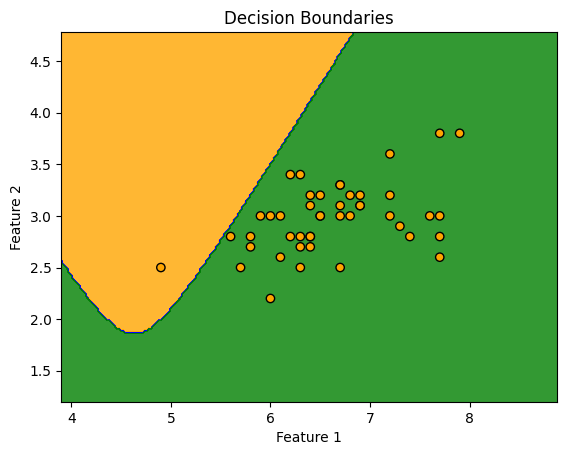

In [45]:
plot_decision_boundaries(val_data, val_labels, model)